<h1>TRABAJO MUESTREO - INFERENCIA</h1>

En los siguientes enlaces encontrará los datos relacionados con los resultados de las pruebas de estado para las Instituciones de Educación Superior (IES) colombianas de carácter universitario de los últimos tres (3) años:

 https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData

Considere estos datos como una población finita. Las variables que componen la tabla son:



 - `periodo:` año de realización de la prueba. La variable se presenta fragmentada debido al origen de los datos. Requiere agruparse adecuadamente. Para ello, consulte la función revalue y describa, brevemente, su funcionamiento.
 -  `apli_consecutivo:` consecutivo asignado al estudiante en el momento de presentar la prueba. Único por estudiante
 -  `estu_depto_reside:` departamento de residencia del estudiante
 -   `estu_cod_reside_depto:` código DANE del departamento de residencia del estudiante
 -   `inst_cod_institucion:` código de la IES ante el ministerio. Único por Institución
 -   `inst_nombre_institucion:` Nombre de la Institución. Algunas presentan sedes y subsedes
 -   `raz_cuant_punt:` Puntaje Razonamiento Cuantitativo
 -   `raz_cuant_des:` Nivel de Desempeño Razonamiento Cuantitativo (categórica)
 -   `lect_crit_punt:` Puntaje Lectura Crítica
 -   `lect_crit_des:` Nivel de Desempeño Lectura Crítica (categórica)
 -   `comp_ciud_punt:` Puntaje Competencias Ciudadanas
 -   `comp_ciud_des:` Nivel de Desempeño Competencias Ciudadanas (categórica)
 -   `ingles_punt:` Puntaje Inglés
 -   `ingles_desem:` Nivel de Desempeño en Inglés (categórica)
 -  `comu_escr_punt:` Puntaje Comunicación Escrita
 -  `comu_escr_des:` Nivel de Desempeño Comunicación Escrita (categórica)

Tenga en cuenta que algunas variables categóricas figuran como numéricas, haga la correspondiente transformación.

Los puntos a desarrollar son:


   1. Realice muestreo aleatorio simple y realice las estimaciones (inferencia) correspondientes. Tenga en cuenta que son múltiples variables
   2.  Realice los correspondientes muestreos estratificados y compare los resultados con los anteriores. Explique las diferencias y/o similitudes
   3.  Realice los correspondientes muestreos por conglomerados y compare los resultados con los puntos 1 y 2. Explique las diferencias y/o similitudes
   4.  ¿Considera que es procedente realizar un muestreo sistemático? Argumente su respuesta
    Si la respuesta del punto 4 fue positiva, realice el correspondiente muestreo y compare con los anteriores
   5.  Para las estimaciones emplee los siguientes niveles de confianza: 90%, 95% y 99%.

El trabajo puede entregarse en formato PDF o como notebook de jupyter

Recomendaciones:

 -   Procure tabular de manera adecuada las estimaciones para optimizar espacio
 -   Evite extenderse en las explicaciones
 -   Trate de optimizar el uso de gráficas (visite el siguiente repositorio si desea una guía: https://github.com/karlosmantilla/graficas-basicas-descriptivas-
 -   Referencie las fórmulas empleadas en los cálculos


**Asignatura: Estadistica 2**

**Profesor: Carlos Alfonso Mantilla Duarte**

**Grupo: F1**



<table style="font-size:14px;">
<thead>
<td style="text-align:center" ><strong>Integrante</strong></td>
<td style="text-align:center"><strong>Codigo</strong></td>
</thead>
<tr>
<td style="text-align:center">Orlando Alberto Moncada Rodriguez</td>
<td style="text-align:center">2170133</td>
</tr>
    <tr>
<td style="text-align:center">Santiago Andres Castro Duitama</td>
<td style="text-align:center">2170134</td>
</tr>
    <tr>
<td style="text-align:center">David Santiago Morales Norato</td>
<td style="text-align:center">2170102</td>
</tr>
</table>

## Funciones y librerias

In [3]:
library('SamplingUtil')

#install.packages('plyr')
#install.packages('samplingbook')

mystats <- function(x, na.omit=FALSE){
  if (na.omit)
    x <- x[!is.na(x)]
  m <- mean(x)
  n <- length(x)
  s <- sd(x)
  skew <- sum((x-m)^3/s^3)/n
  kurt <- sum((x-m)^4/s^4)/n - 3
  return(c("tamaño"=n, "media"=m, "desviación estándar"=s, "simetría"=skew, "kurtosis"=kurt))
}
library(plyr)
library(tidyverse)
library(samplingbook)

## Importar datos

In [4]:
saberpro<-get(load("saberpro.RData"))
#saberpro<-(load(url("https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData?dl=1")))
#head(saberpro) #Cargamos los datos en una variable llamada "saberpro" e imprimimos los 6 primeros datos.

Warning message in load("saberpro.RData"):
“input string 'COLEGIO DE ESTUDIOS SUPERIORES DE ADMINISTRACION-CESA-BOGOTÁ D.C.' cannot be translated to UTF-8, is it valid in 'CP1252'?”
Warning message in load("saberpro.RData"):
“input string 'COLEGIO MAYOR DE NUESTRA SEÑORA DEL ROSARIO-BOGOTÁ D.C.' cannot be translated to UTF-8, is it valid in 'CP1252'?”
Warning message in load("saberpro.RData"):
“input string 'CORPORACION ESCUELA DE ARTES Y LETRAS-BOGOTÁ D.C.' cannot be translated to UTF-8, is it valid in 'CP1252'?”
Warning message in load("saberpro.RData"):
“input string 'CORPORACION INTERNACIONAL PARA EL DESARROLLO EDUCATIVO -CIDE-BOGOTÁ D.C.' cannot be translated to UTF-8, is it valid in 'CP1252'?”
Warning message in load("saberpro.RData"):
“input string 'CORPORACION TECNOLOGICA INDUSTRIAL COLOMBIANA - TEINCO-BOGOTÁ D.C.' cannot be translated to UTF-8, is it valid in 'CP1252'?”
Warning message in load("saberpro.RData"):
“input string 'CORPORACION UNIFICADA NACIONAL DE EDUCACION SUPERI

In [5]:
dim(saberpro) #Cantidad de columnas y filas del dataframe

[1] 725295     16

## Arreglo de la Variable Periodo 

In [6]:
unique(saberpro[,1])

[1] 20163 20162 20173 20172 20183 20182 20184

Encontramos los valores unicos, para ver las diferentes unidades sin repetición de la variable periodo. Podemos deducir que los años que pueden estar en el dataset son 2016, 2017, 2018. Las unidades contenidas en la variable periodo tienen un número extra final en cada unidad, por ejemplo el 2016, tienen un valor 20162 en la variable. Para arreglar este error, se sugiere el uso de la función "ravalue" la cual recibe como parámetro un vector el cual desea ser cambiado, su segundo parámetro es vector de caracteres con nombre, con valores nuevos como valores y valores antiguos como nombres. Y como último parámetro tiene un warning que será mostrado en el caso de que un valor que se desea reemplazar del segundo parámetro no se encuentra contenido en el primero.

El función revalue funciona de forma sencilla e intuitiva, recibe un vector con valores que queremos cambiar, luego le pasamos un vector mencionando que valores queremos cambiar y porqué valores cambiarlos.
 
Sin embargo esta función no nos va servir, porque sus parámetros deben ser de tipo fct, o character, es por esto que usaremos una función similar llamada mapvalues, que toma 3 parámetros, el primero es el vector que queremos cambiar, el segundo los valores dentro del vector que vamos a cambiar, y el tercero un vector con los valores que se reemplazaran en el orden respectivo del segundo parámetro.


In [7]:
saberpro[,1]<- mapvalues(saberpro[,1],from=c(20163,20162),to=c(2016,2016))
saberpro[,1]<- mapvalues(saberpro[,1],from=c(20173,20172),to=c(2017,2017))
saberpro[,1]<- mapvalues(saberpro[,1],from=c(20183,20182,20184),to=c(2018,2018,2018))

In [8]:
unique(saberpro[,1]) # Comprobamos que haya funcionado

[1] 2016 2017 2018

## Arreglo de la Variable Departamento usando revalue

In [9]:
#Arreglo valores de Nariño, debido a que al cargar la codificación UTF-8 es_CO no es teniada en cuenta, por lo tanto tildes y ñ no son validas
saberpro[,3] <- revalue(saberpro[,3], c( 'NARIÃ‘O'= "NARIÑO", 'NARIÃƒâ€˜O' = "NARIÑO"))
unique(saberpro[,3])# Ver las regiones 

[1] ATLANTICO       CUNDINAMARCA    CALDAS          MAGDALENA      
 [5] CORDOBA         CAUCA           BOGOTA          ANTIOQUIA      
 [9] META            CESAR           VALLE           TOLIMA         
[13] BOYACA          SANTANDER       BOLIVAR                        
[17] HUILA           NORTE SANTANDER SUCRE           QUINDIO        
[21] VAUPES          RISARALDA       NARIÑO          CAQUETA        
[25] CASANARE        CHOCO           PUTUMAYO        LA GUAJIRA     
[29] GUAVIARE        ARAUCA          SAN ANDRES      VICHADA        
[33] AMAZONAS        EXTRANJERO      GUAINIA        
35 Levels:  AMAZONAS ANTIOQUIA ARAUCA ATLANTICO BOGOTA BOLIVAR ... VICHADA

## Calcular tamaño de la muestra

Para los siguientes ejercicios necesitaremos una muestra de la poblacion total, para ello como variables usaremos un nivel de confianza del 95%, la poblacion que como se nos indica anteriormente es de 725295 y el nivel de error (e) de 0.05.


In [10]:
TM<-sample.size.prop(e=0.05, P = 0.5, N = 725295 , level = 0.95)
print(TM)


sample.size.prop object: Sample size for proportion estimate
With finite population correction: N=725295, precision e=0.05 and expected proportion P=0.5

Sample size needed: 384



## 1. Realice muestreo aleatorio simple y realice las estimaciones (inferencia) correspondientes. Tenga en cuenta que son múltiples variables

In [11]:
puntajes<-data.frame(periodo=saberpro$periodo,dpto=saberpro$estu_depto_reside,puntajeing=saberpro$ingles_punt, puntajelec=saberpro$lect_crit_punt, puntajeraz=saberpro$raz_cuant_punt)

In [12]:
n1<-100
n2<-200
n3<-500
n4<-1000
muestra1<- sample(1:nrow(puntajes),size=n1,replace=FALSE)
muestra2<- sample(1:nrow(puntajes),size=n2,replace=FALSE)
muestra3<- sample(1:nrow(puntajes),size=n3,replace=FALSE)
muestra4<- sample(1:nrow(puntajes),size=n4,replace=FALSE)
head(muestra3)

[1] 322730 261152 628760 654378 210484 196003

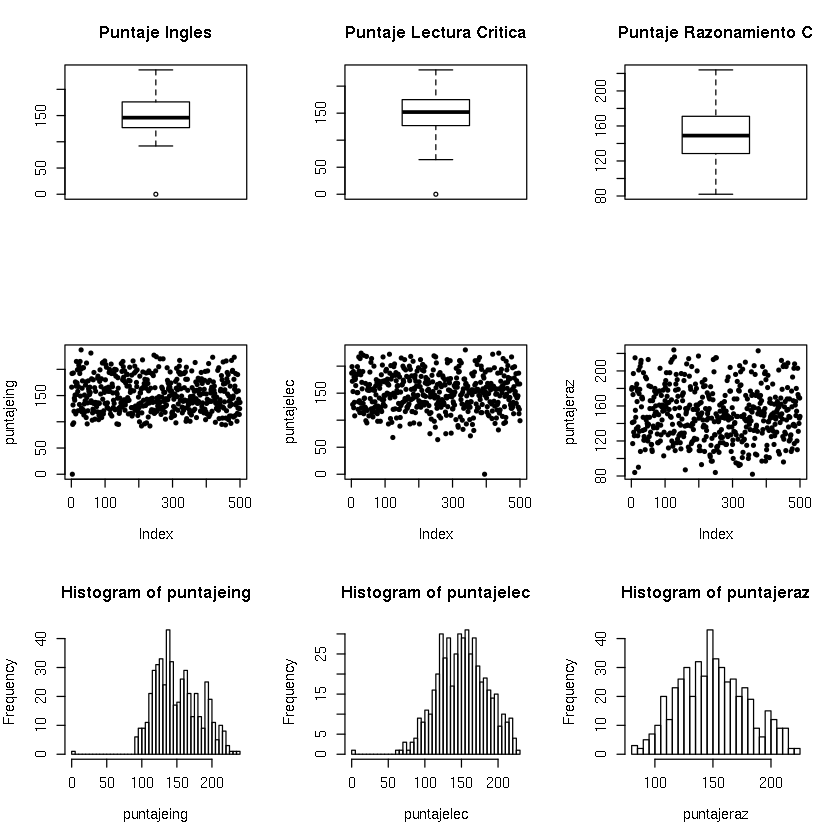

In [13]:
par(mfrow=c(3,3))
with(puntajes[muestra3,], boxplot(puntajeing, main="Puntaje Ingles"))
with(puntajes[muestra3,], boxplot(puntajelec, main="Puntaje Lectura Critica"))
with(puntajes[muestra3,], boxplot(puntajeraz, main="Puntaje Razonamiento C"))
with(puntajes[muestra3,], plot(puntajeing, pch = 20))
with(puntajes[muestra3,], plot(puntajelec, pch = 20))
with(puntajes[muestra3,], plot(puntajeraz, pch = 20))
with(puntajes[muestra3,], hist(puntajeing, nclass = 50))
with(puntajes[muestra3,], hist(puntajelec, nclass = 50))
with(puntajes[muestra3,], hist(puntajeraz, nclass = 50))
par(mfrow=c(1,1))

In [14]:
head(puntajes)

,periodo,dpto,puntajeing,puntajelec,puntajeraz
,<dbl>,<fct>,<int>,<int>,<int>
1,2016,ATLANTICO,160,130,160
2,2016,CUNDINAMARCA,125,132,138
3,2016,CALDAS,104,157,146
4,2016,MAGDALENA,160,172,160
5,2016,CORDOBA,192,122,130
6,2016,CAUCA,108,129,159


In [15]:
pop<-round(mystats(puntajes[,'puntajeing']),1)
m1<-round(mystats(puntajes[muestra1,'puntajeing']),1)
m2<-round(mystats(puntajes[muestra2,'puntajeing']),1)
m3<-round(mystats(puntajes[muestra3,'puntajeing']),1)
m4<-round(mystats(puntajes[muestra4,'puntajeing']),1)
data.frame(pop,m1,m2,m3,m4)
pop<-round(mystats(puntajes[,'puntajelec']),1)
m1<-round(mystats(puntajes[muestra1,'puntajelec']),1)
m2<-round(mystats(puntajes[muestra2,'puntajelec']),1)
m3<-round(mystats(puntajes[muestra3,'puntajelec']),1)
m4<-round(mystats(puntajes[muestra4,'puntajelec']),1)
data.frame(pop,m1,m2,m3,m4)
pop<-round(mystats(puntajes[,'puntajeraz']),1)
m1<-round(mystats(puntajes[muestra1,'puntajeraz']),1)
m2<-round(mystats(puntajes[muestra2,'puntajeraz']),1)
m3<-round(mystats(puntajes[muestra3,'puntajeraz']),1)
m4<-round(mystats(puntajes[muestra4,'puntajeraz']),1)
data.frame(pop,m1,m2,m3,m4)

,pop,m1,m2,m3,m4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
tamaño,"725295,0","100,0","200,0","500,0","1000,0"
media,"150,4","149,1","152,5","151,7","152,5"
desviación estándar,"31,9","29,1","29,8","32,6","32,0"
simetría,"0,3","0,4","0,4","0,2","0,1"
kurtosis,"1,5","-0,4","-0,5","0,0","0,9"


,pop,m1,m2,m3,m4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
tamaño,"725295,0","100,0","200,0","500,0","1000,0"
media,"150,1","145,2","151,9","151,4","150,8"
desviación estándar,"31,0","28,4","30,1","33,7","31,0"
simetría,"0,0","0,0","0,0","-0,1","-0,1"
kurtosis,"-0,3","-0,3","-0,5","0,1","-0,6"


,pop,m1,m2,m3,m4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
tamaño,"725295,0","100,0","200,0","500,0","1000,0"
media,"149,5","148,2","150,1","150,7","149,8"
desviación estándar,"30,7","30,9","33,5","29,7","30,9"
simetría,"0,2","0,2","0,4","0,2","0,2"
kurtosis,"0,1","-0,5","1,0","-0,5","0,0"


Ahora vamos a ver como varia las graficas del puntaje obtenido en ingles a traves de los años en ingles, para ello usaremos las muestras y graficaremos para observar si hay alguna diferencia.

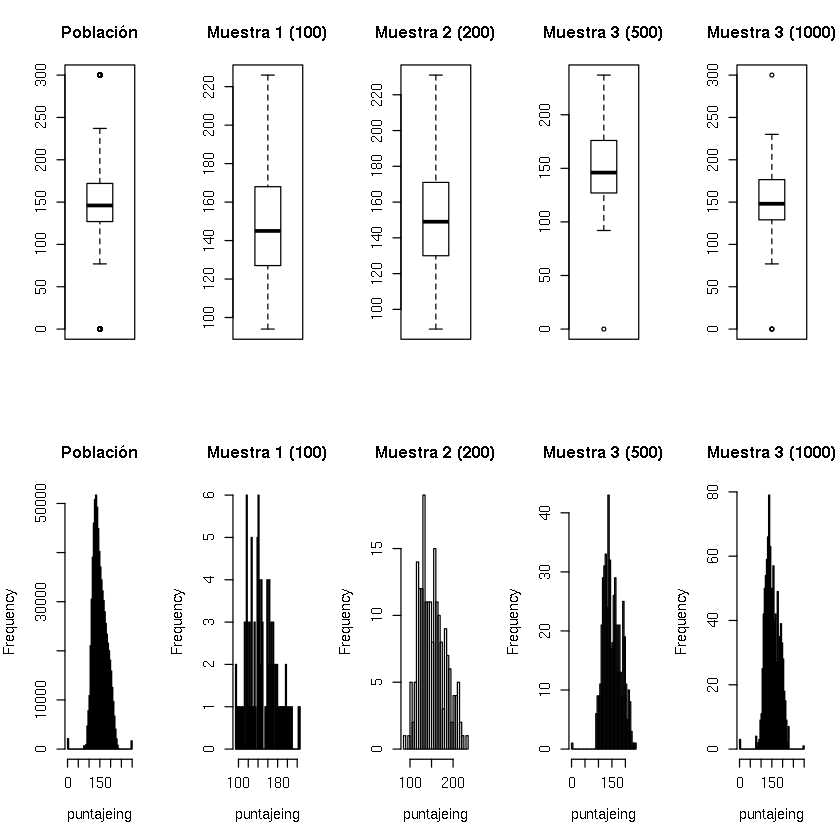

In [16]:
par(mfrow=c(2,5))
with(puntajes, boxplot(puntajeing, main = 'Población'))
with(puntajes[muestra1,], boxplot(puntajeing, main = 'Muestra 1 (100)'))
with(puntajes[muestra2,], boxplot(puntajeing, main = 'Muestra 2 (200)'))
with(puntajes[muestra3,], boxplot(puntajeing, main = 'Muestra 3 (500)'))
with(puntajes[muestra4,], boxplot(puntajeing, main = 'Muestra 3 (1000)'))
with(puntajes, hist(puntajeing, nclass = 50, main = 'Población'))
with(puntajes[muestra1,], hist(puntajeing, nclass = 50, main = 'Muestra 1 (100)'))
with(puntajes[muestra2,], hist(puntajeing, nclass = 50, main = 'Muestra 2 (200)'))
with(puntajes[muestra3,], hist(puntajeing, nclass = 50, main = 'Muestra 3 (500)'))
with(puntajes[muestra4,], hist(puntajeing, nclass = 50, main = 'Muestra 3 (1000)'))
par(mfrow=c(1,1))

## Inferencias

Gracias a las graficas y a las tablas generadas por el software podemos comparar de forma facil e intuitiva los 3 tipos de puntajes que analizamos en este caso.

A simple vista se puede ver que los puntajes de lectura critica y razonamiento cuantitativo estan mas dispersos, lo cual hara que al graficar sus datos formen una campana gausiana mesocurtica ya que su curtosis oscila o tiende al 0. En cambio, el puntaje de ingles se agrupa en la media formando una grafica leptocurtica. Esto nos quiere decir que los estudiantes en Colombia en un muy alto promedio poseen las mismas capacidades en la prueba de ingles como si tuviesen el mismo nivel de ingles, mientras que en las otras dos materias no tienen eel mismo nivel.

Ahora bien podemos ver que superando la cantidad de la muestra por defecto (384) la grafica se asemeja en gran manera a la grafica poblacional, es decir, a medida que pasamos el 95% de confianza podemos ver practicamente como se distribuye todo el cuerpo estudiantil en las pruebas de ingles.

2.  Realice los correspondientes muestreos estratificados y compare los resultados con los anteriores. Explique las diferencias y/o similitudes

In [18]:
library(magrittr) # Permite leer la función %>%

In [19]:
Estratos<- puntajes %>%
  select(periodo,puntajeing) %>%
  group_by(periodo) %>%
  summarise(n=n(),
            s=sd(puntajeing)) %>%
  mutate(p=n/sum(n))

Estratos

`summarise()` ungrouping output (override with `.groups` argument)



periodo,n,s,p
<dbl>,<int>,<dbl>,<dbl>
2016,242628,"31,87524","0,3345232"
2017,245566,"31,64669","0,3385740"
2018,237101,"32,32753","0,3269028"


In [20]:
nsizeProp100<-nstrata(n=100,wh=Estratos[,4],method="proportional")
nsizePropTM<-nstrata(n=384,wh=Estratos[,4],method="proportional")
nsizeProp500<-nstrata(n=500,wh=Estratos[,4],method="proportional")

In [21]:
data.frame(per=Estratos$periodo,nsizeProp100,nsizePropTM,nsizeProp500)

per,p,p.1,p.2
<dbl>,<dbl>,<dbl>,<dbl>
2016,34,129,168
2017,34,131,170
2018,33,126,164


In [22]:
m2016<-129
m2016TM<- sample(1:nrow(puntajes[puntajes$periodo=='2016',]),size=m2016,replace=FALSE)
#m2016TM

In [23]:
m2017<-131
m2017TM<- sample(1:nrow(puntajes[puntajes$periodo=='2017',]),size=m2017,replace=FALSE)
#m2017TM

In [24]:
m2018<-126
m2018TM<- sample(1:nrow(puntajes[puntajes$periodo=='2018',]),size=m2018,replace=FALSE)
#m2018TM

In [25]:
mestrato<-c(m2016TM,m2017TM,m2018TM)

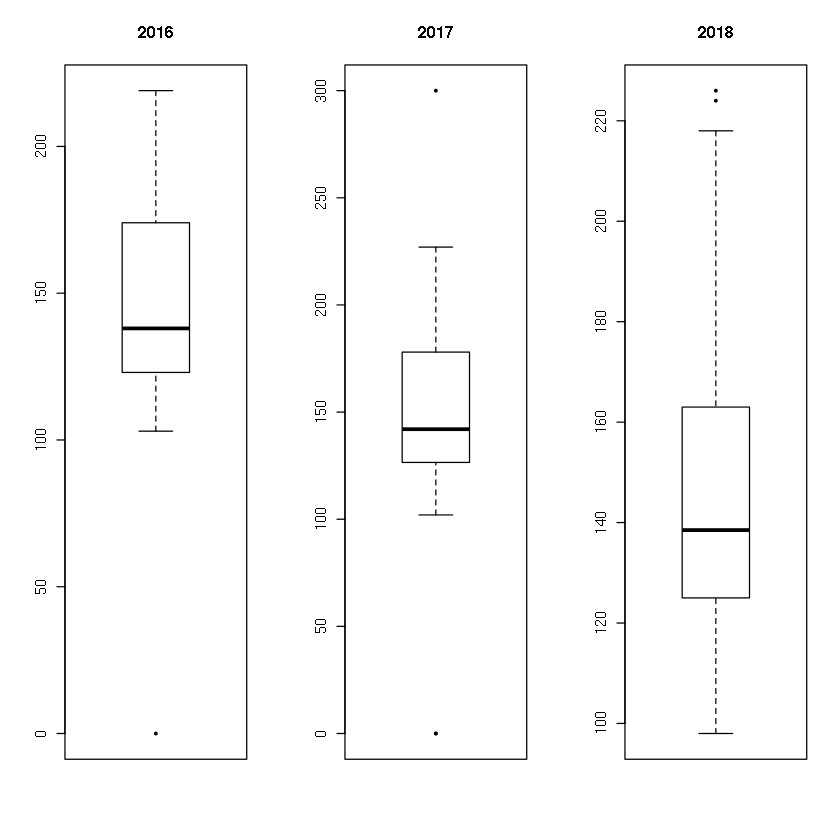

In [26]:
par(mfrow=c(1,3))

with(puntajes[m2016TM,], boxplot(puntajeing, pch = 20, main = '2016'))
with(puntajes[m2017TM,], boxplot(puntajeing, pch = 20, main = '2017'))
with(puntajes[m2018TM,], boxplot(puntajeing, pch = 20, main = '2018'))

par(mfrow=c(1,1))

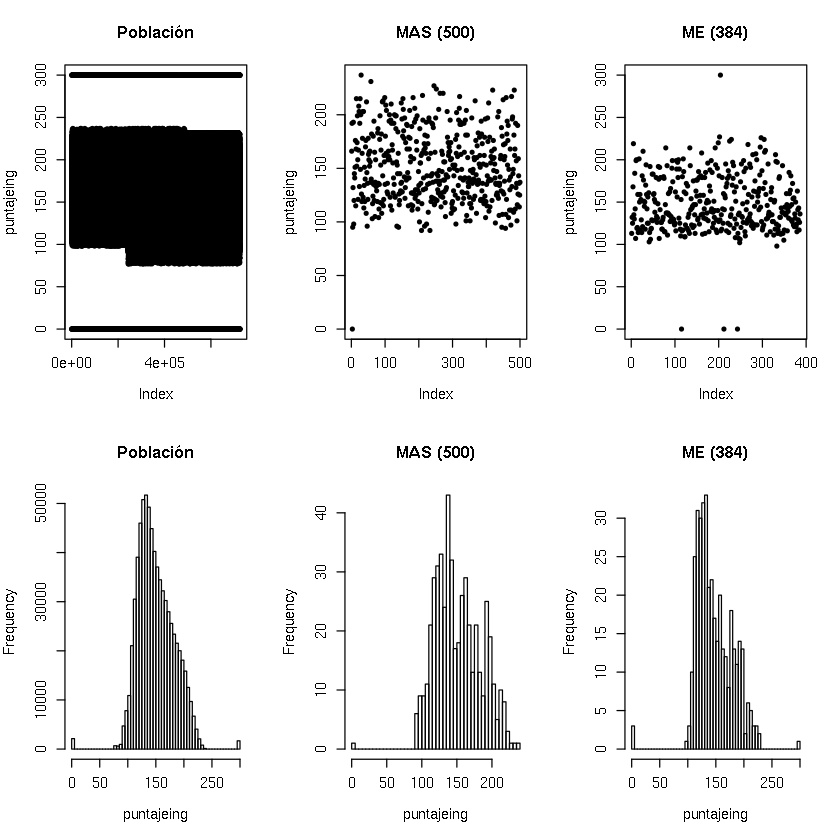

In [27]:
par(mfrow=c(2,3))

with(puntajes, plot(puntajeing, pch = 20, main = 'Población'))
with(puntajes[muestra3,], plot(puntajeing, pch = 20, main = 'MAS (500)'))
with(puntajes[mestrato,], plot(puntajeing, pch = 20, main = 'ME (384)'))

with(puntajes, hist(puntajeing, nclass = 50, main = 'Población'))
with(puntajes[muestra3,], hist(puntajeing, nclass = 50, main = 'MAS (500)'))
with(puntajes[mestrato,], hist(puntajeing, nclass = 50, main = 'ME (384)'))

par(mfrow=c(1,1))

## Inferencia

Primero, como conclusion de lo anterior, podemos ver que comparando los puntajes en la categoria de ingles a traves de los tres años (2016,2017,2018) se presenta una mejora en el nivel de ingles en los estudiantes del año 2017 lo cual nos podria hacer llegar a una nueva investigacion del porque se presento la mejora en la puntuacion ya que en el 2018 volvio a bajar.

Ahora bien el punto mas interesante y determinante de este ejercicio esta radicado en la diferencia entre el muestreo aleatorio simple (MAS) y el muestreo estratificado (ME) el cual nos revela que con la muestra obtenida en el incio de este taller (384) su grafica presenta una mejor distribucion asimilandoce al de la poblacion, mientras que con una muestra de 500 datos el MAS no logra acercarse de forma congruente a la grafica poblacional del dataframe. Esto nos lleva a suponer que el muestreo estraficado presenta una mejoria en cuanto a precision de sus datos.

3.  Realice los correspondientes muestreos por conglomerados y compare los resultados con los puntos 1 y 2. Explique las diferencias y/o similitudes

In [29]:
#head(saberpro,2)

In [30]:
#Creamos un Data Frame con las informacion necesaria. 
puntajes_conglomerados<-data.frame(dpto=saberpro$estu_depto_reside
                    ,puntajecomp=saberpro$comp_ciud_punt
                    ,puntajeing=saberpro$ingles_punt, puntajelec=saberpro$lect_crit_punt,
                     puntajeraz=saberpro$raz_cuant_punt,puntajecomu=saberpro$comu_escr_punt)

In [31]:
Conglomerados<- puntajes_conglomerados %>%
  select(dpto,puntajeing) %>%
  group_by(dpto) %>%
  summarise(n=n(),
            std1=sd(puntajeing)) %>%
  mutate(p=n/sum(n))
  
head(Conglomerados,6)

`summarise()` ungrouping output (override with `.groups` argument)



dpto,n,std1,p
<fct>,<int>,<dbl>,<dbl>
,1997,"39,72940","0,0027533624"
AMAZONAS,195,"24,34471","0,0002688561"
ANTIOQUIA,86465,"33,45743","0,1192135614"
ARAUCA,1863,"21,68492","0,0025686100"
ATLANTICO,41127,"33,44570","0,0567038240"
BOGOTA,210798,"32,69948","0,2906376026"


In [25]:
nsCProp100<-nstrata(n=384,wh=Conglomerados[,4],method="proportional")
muestras_por_conglomerado =  data.frame(dpto=Conglomerados$dpto,nsCProp100)
head(muestras_por_conglomerado)
nombre_departamento = muestras_por_conglomerado[[1]]
size = muestras_por_conglomerado[[2]]


ERROR: Error in nstrata(n = 500, wh = Conglomerados[, 3], method = "proportional"): object 'Conglomerados' not found


In [26]:
output<-c()
for (i in seq_along(nombre_departamento)) {      
    nvar <- sample(1:nrow(puntajes_conglomerados[puntajes_conglomerados$dpto==nombre_departamento[i],]),size=size[i],replace=FALSE)  
    output<-append(output,nvar) 
}

MC <- puntajes_conglomerados[output,]
head(MC)


ERROR: Error in `[.data.frame`(saberpro, saberpro$estu_depto_reside == nombre_departamento[i], : object 'nombre_departamento' not found


ERROR: Error in MC[, "puntajeing"]: número incorreto de dimensiones


In [61]:
#MAS n = 384
n5=384
muestra5 = sample(1:nrow(puntajes),size=n5,replace=FALSE)
pop<-round(mystats(puntajes_conglomerados[,'puntajeing']),1)
MAS<-round(mystats(puntajes[muestra5,'puntajeing']),1)
ME<-round(mystats(puntajes[muestra4,'puntajeing']),1)
MC<-round(mystats(puntajes_conglomerados[output,'puntajeing']),1)
data.frame(pop,MAS,ME,MC)
pop<-round(mystats(puntajes[,'puntajelec']),1)
m1<-round(mystats(puntajes[muestra1,'puntajelec']),1)
m2<-round(mystats(puntajes[muestra2,'puntajelec']),1)
m3<-round(mystats(puntajes[muestra3,'puntajelec']),1)
m4<-round(mystats(puntajes[muestra4,'puntajelec']),1)
data.frame(pop,m1,m2,m3,m4)
pop<-round(mystats(puntajes[,'puntajeraz']),1)
m1<-round(mystats(puntajes[muestra1,'puntajeraz']),1)
m2<-round(mystats(puntajes[muestra2,'puntajeraz']),1)
m3<-round(mystats(puntajes[muestra3,'puntajeraz']),1)
m4<-round(mystats(puntajes[muestra4,'puntajeraz']),1)
data.frame(pop,m1,m2,m3,m4)

,pop,MAS,ME,MC
,<dbl>,<dbl>,<dbl>,<dbl>
tamaño,"725295,0","384,0","1000,0","404,0"
media,"150,4","150,0","152,0","150,9"
desviación estándar,"31,9","31,6","32,1","32,5"
simetría,"0,3","0,3","0,1","0,4"
kurtosis,"1,5","1,5","1,7","1,0"


,pop,m1,m2,m3,m4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
tamaño,"725295,0","100,0","200,0","500,0","1000,0"
media,"150,1","152,2","152,6","149,4","152,5"
desviación estándar,"31,0","28,2","32,6","31,6","31,1"
simetría,"0,0","-0,1","0,2","0,0","0,2"
kurtosis,"-0,3","-0,3","-0,6","-0,2","0,3"


,pop,m1,m2,m3,m4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
tamaño,"725295,0","100,0","200,0","500,0","1000,0"
media,"149,5","152,6","147,3","148,1","151,2"
desviación estándar,"30,7","30,0","31,3","29,7","30,2"
simetría,"0,2","0,1","0,3","0,2","0,1"
kurtosis,"0,1","-0,6","-0,6","-0,4","-0,6"


In [49]:
par(mfrow=c(1,2))
with(MC, hist(puntajeing, main = 'Conglomerado MC1'))
with(MC, plot(puntajeing, pch=20, main = 'ConglomeradosMC1'))

ERROR: Error in with(MC500, hist(raz_cuant_punt, main = "Conglomerado")): object 'MC500' not found


4.  ¿Considera que es procedente realizar un muestreo sistemático? Argumente su respuesta

5.  Para las estimaciones emplee los siguientes niveles de confianza: 90%, 95% y 99%.